In [1]:
import numpy as np
from pyscf import fci

Exact

In [5]:
from scipy.integrate import quad
from scipy.special import *

U = []
E_LW = []

for Ui in np.linspace(1,10,6):
    Ei, err = quad(lambda x: j0(x) * j1(x) / (x * (1 + np.exp(Ui * x / 2))),0, 200)
    U.append(Ui)
    E_LW.append(-4*Ei)

print(E_LW[0])
print(err)

-1.040368653394435
8.675909540485985e-11


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


Text(0.5, 1.0, 'Lieb-Wu Solution for the Hubbard Model')

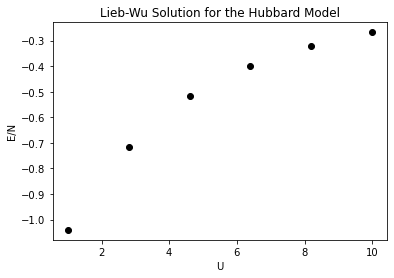

In [38]:
import matplotlib.pyplot as plt
plt.plot(U,E_LW,'ok')
plt.ylabel("E/N")
plt.xlabel("U")
plt.title("Lieb-Wu Solution for the Hubbard Model")

In [27]:
""" 2 site hubbard model with 2 electrons. Should return U=\frac{1}{2}\left[U-\sqrt{U^{2}+16 t^{2}}\right]$
numerical result is -1.561552812 """

#numpy.random.seed(1)
norb = 2
nelec = (1,1)

h1 = np.zeros([norb,norb])
h1[(1,0)] = -1.0

h1 = h1 + h1.T

U=[]
E2=[]
for Ui in np.linspace(1,10,6):
    h2 = np.zeros((norb,norb,norb,norb))
    h2[(0,0,0,0)] = Ui
    h2[(1,1,1,1)] = Ui
    
    H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=4)[1]
    e_all, v_all = np.linalg.eigh(H_fci)
    
    e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=40,
                                        max_space=30, max_cycle=100)
    U.append(Ui)
    E2.append(e[0])

print('U=1:')
print('energy', E2[0])

U=1:
energy -1.561552812808828


In [22]:
#numpy.random.seed(1)
norb = 8
nelec = (norb//2,norb//2)

h1 = np.zeros([norb,norb])
for n in range(norb):
    h1[(n,(n+1)%norb)] = -1.0

h1 = h1 + h1.T
print(h1)
U=[]
E8=[]
for Ui in np.linspace(1,10,6):
    h2 = np.zeros((norb,norb,norb,norb))
    for n in range(norb):
        h2[(n,n,n,n)] = Ui
    
    H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=4)[1]
    e_all, v_all = np.linalg.eigh(H_fci)
    
    e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=10,
                                        max_space=30, max_cycle=100)
    U.append(Ui)
    E8.append(e[0])

[[ 0. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  0.]]


Text(0.5, 1.0, 'Lieb-Wu Solution and FCI Solutions for Finite Systems')

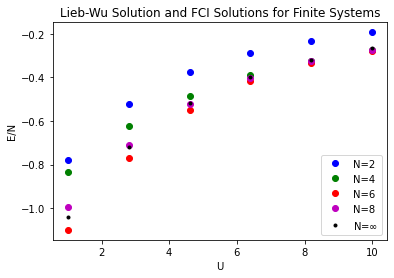

In [40]:
plt.figure(0)
plt.plot(U , np.array(E2)/2 , 'ob')
plt.plot(U , np.array(E4)/4 , 'og')
plt.plot(U , np.array(E6)/6 , 'or')
plt.plot(U , np.array(E8)/8 , 'om')
plt.plot(U,E_LW,'ok',markersize=3)

plt.legend(["N=2","N=4","N=6","N=8","N=$\infty$"],loc='lower right')
plt.ylabel("E/N")
plt.xlabel("U")

plt.title("Lieb-Wu Solution and FCI Solutions for Finite Systems")